The optimal number of neighbor is 1


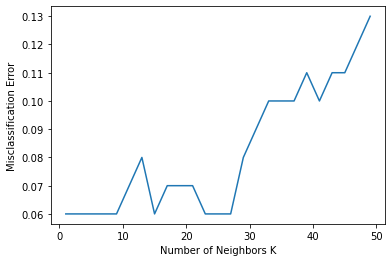

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Create Data set
names = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width',
    'class',
]

class PreliminaryForData:
    """ Load Data from csv """
    def __init__(self):
        df = pd.read_csv('iris.data.txt', header=None, names=names)
        df.head()
    
        self.X = np.array(df.iloc[:,0:4])
        self.y = np.array(df['class'])
    
    def SplitAndTrainData(self):
        X_train, \
        X_test, \
        y_train, \
        y_test = train_test_split(self.X, self.y, test_size=0.33, random_state = 42)
        self.knnAlgorithm(X_train, X_test, y_train, y_test)
        
    def knnAlgorithm(self,X_train, X_test, y_train, y_test):
        """ KNN """
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.metrics import accuracy_score
        
        # Instantiate learning model (k = 3)
        knn = KNeighborsClassifier(n_neighbors = 3)
        # Fitting The Model
        knn.fit(X_train, y_train)
        # Predict The Response
        pred = knn.predict(X_test)
        
        from sklearn.model_selection import cross_val_score
        neighbors = list(range(1, 50, 2))
        cv_scores = []
        
        for k in neighbors:
            knn = KNeighborsClassifier(n_neighbors = k)
            scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
            cv_scores.append(scores.mean())
            
        mse = [1 - x for x in cv_scores]
        optimal_k = neighbors[mse.index(min(mse))]
        
        print("The optimal number of neighbor is {}".format(optimal_k))

        plt.plot(neighbors, mse)
        plt.xlabel("Number of Neighbors K")
        plt.ylabel("Misclassification Error")
        plt.show()
        
        
k = PreliminaryForData()
k.SplitAndTrainData()
